In [35]:
%matplotlib inline
import torch
import random
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from IPython import display
import Ipynb_importer
from torch.utils.data import DataLoader
import cnn
import numpy as np
from jupyterthemes import jtplot
print("torch version : {}".format(torch.__version__))

torch version : 1.4.0


In [29]:
model_path = './model.pth'
model = torch.load(model_path)
print("model loaded from {}".format(model_path))

model loaded from ./model.pth


In [30]:
data_tf = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])

test_dataset = datasets.MNIST(root = './data', train = False, transform = data_tf)
test_loader = DataLoader(test_dataset, batch_size = 128, shuffle = False)
print("test data loaded")

test data loaded


In [31]:
def get_labels(labels):
    text_labels = ['0', '1', '2', '3', '4',
                   '5', '6', '7', '8', '9']
    return [text_labels[int(i)] for i in labels]

In [32]:
X, y = iter(test_loader).next()
if torch.cuda.is_available():
    print("cuda is available")
    X = X.cuda()
    y = y.cuda()
true_label = get_labels(y.cpu().numpy())
pre_label = get_labels(model(X).argmax(dim = 1).cpu().numpy())
titles = ['TRUE NUMBER : '+ true + '\n' + 'PRED NUMBER : ' + pre   for true, pre in zip(true_label, pre_label)]

cuda is available


In [33]:
def show_mnist(images, labels):
    display.set_matplotlib_formats('svg')
    _, figs = plt.subplots(len(images), 1, figsize = (140, 140))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

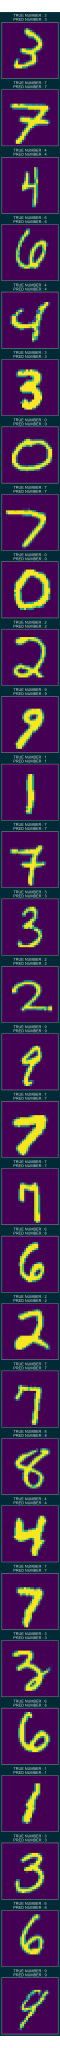

In [34]:
jtplot.style(theme = 'solarizedd')
rand = random.randint(0, 98)
show_mnist(X.cpu()[rand : rand + 30], titles[rand : rand + 30])